<a href="https://colab.research.google.com/github/Eumin-Zoh/Time-Series-and-Forecasting/blob/main/LLY_stock_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Eli Lilly Stock Price Prediction

In [ ]:
# Import libraries
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
from pylab import rcParams
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error

In [ ]:
# Import data
df = pd.read_csv("BATS_LLY_1996-2023.csv")

## EDA

In [ ]:
df.head()

,Date,open,high,low,close,Adj Close,Volume
0,1/2/96,28.0000,28.0000,27.3750,27.6875,27.6875,2925200.000
1,1/3/96,27.5000,27.5625,26.3750,26.6875,26.6875,3003047.619
2,1/4/96,26.5000,27.0625,26.4375,26.7500,26.7500,3047180.952
3,1/5/96,26.6875,26.8750,26.2500,26.5625,26.5625,2962933.333
4,1/8/96,26.5000,27.0000,26.5000,26.8750,26.8750,2876971.429


In [ ]:
# Change the 'Date' column to date formate
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
# Check to see if there is null values
df.isnull().sum()

Date         0
open         0
high         0
low          0
close        0
Adj Close    0
Volume       0
dtype: int64

In [ ]:
# Setting date as an index
df1 = df.set_index("Date")
df1.head()

,open,high,low,close,Adj Close,Volume
Date,,,,,,
1996-01-02,28.0000,28.0000,27.3750,27.6875,27.6875,2925200.000
1996-01-03,27.5000,27.5625,26.3750,26.6875,26.6875,3003047.619
1996-01-04,26.5000,27.0625,26.4375,26.7500,26.7500,3047180.952
1996-01-05,26.6875,26.8750,26.2500,26.5625,26.5625,2962933.333
1996-01-08,26.5000,27.0000,26.5000,26.8750,26.8750,2876971.429


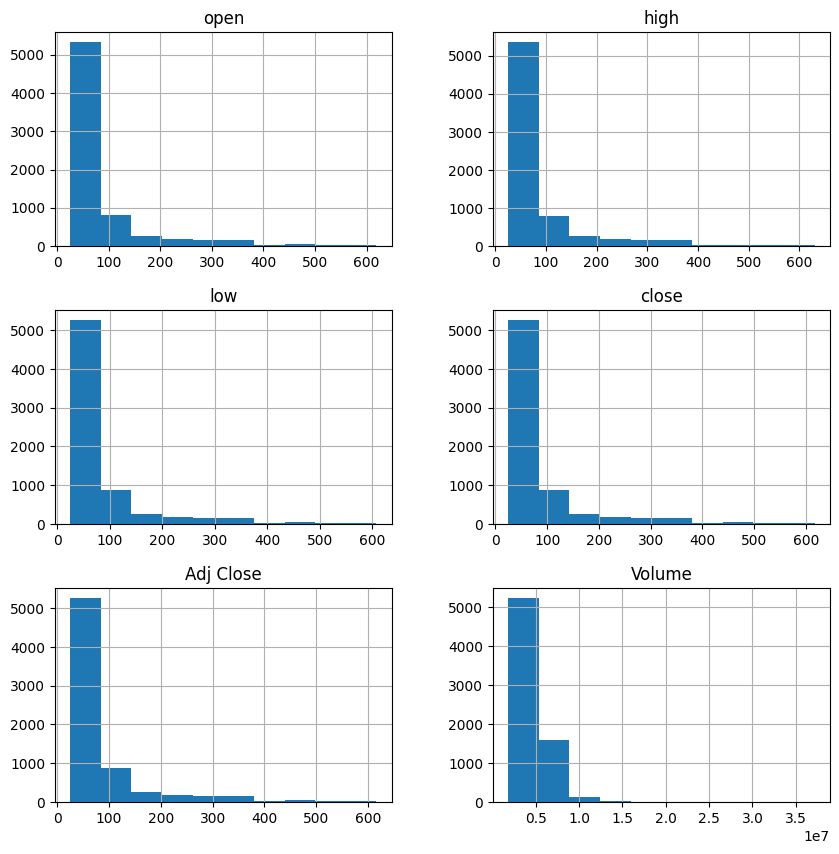

In [ ]:
df1.hist(figsize = (10,10))
plt.show()

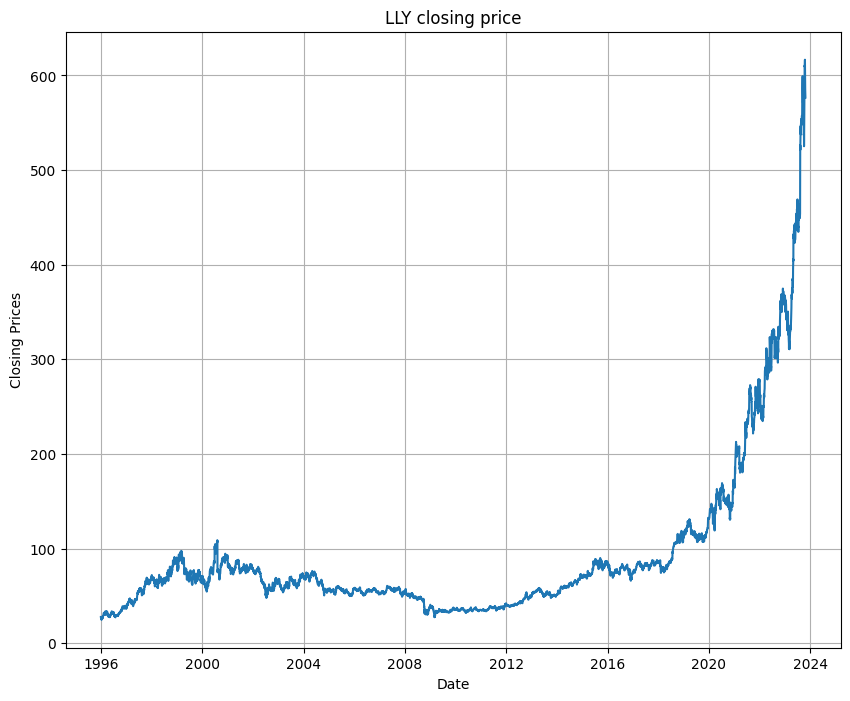

In [ ]:
# Plot the closing price
plt.figure(figsize=(10,8))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Closing Prices')
plt.plot(df1['close'])
plt.title('LLY closing price')
plt.show();

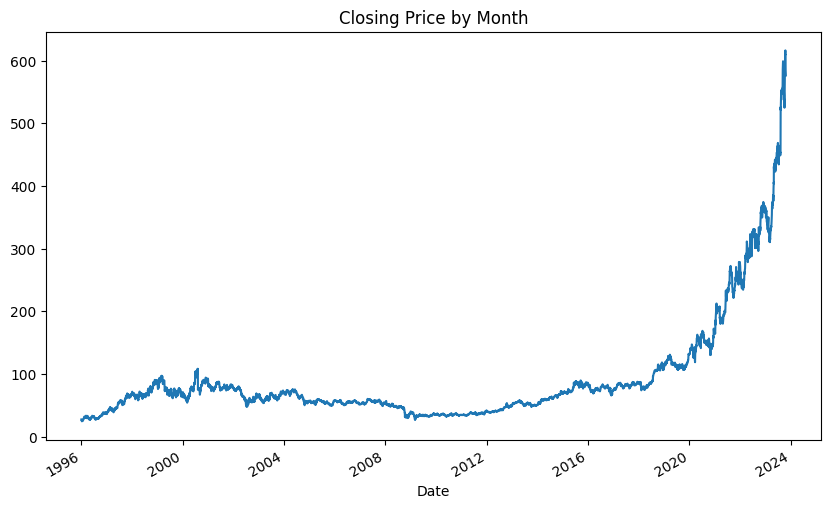

In [ ]:
# Plot the average closing price by month
df2 = df1.groupby(['Date'])['close'].mean()
df2.plot(figsize=(10,6), title = "Closing Price by Month");

## Stationary-Check
### ADF (Augmented Dickey-Fuller) Test

In [ ]:
print('Results of Dickey-Fuller Test')
df_test = adfuller(df1['close'])
df_output = pd.Series(df_test[0:4], index = ['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key, value in df_test[4].items():
        df_output['Critical Value (%s)' %key] = value
print(df_output)

Results of Dickey-Fuller Test
Test Statistic                    6.684061
p-value                           1.000000
#Lags Used                       32.000000
Number of Observations Used    6968.000000
Critical Value (1%)              -3.431289
Critical Value (5%)              -2.861955
Critical Value (10%)             -2.566991
dtype: float64


Because the p-value is greater than 0.05 and the test statistics is greater than the critical value (5%), we can say that the data is non-stationary.

#### 1) Differencing
We will take the first order difference of 'close' column annd re-run the dickey fuller test.

In [ ]:
df1_diff = df1[['close']].diff(periods = 1)
df1_diff = df1_diff.dropna()
df1_diff

,close
Date,
1996-01-03,-1.0000
1996-01-04,0.0625
1996-01-05,-0.1875
1996-01-08,0.3125
1996-01-09,-0.8750
...,...
2023-10-17,-8.3300
2023-10-18,-1.0700
2023-10-19,-16.4400


In [ ]:
print('Results of Dickey-Fuller Test')
df_test = adfuller(df1_diff)
df_output = pd.Series(df_test[0:4], index = ['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key, value in df_test[4].items():
        df_output['Critical Value (%s)' %key] = value
print(df_output)

Results of Dickey-Fuller Test
Test Statistic                -1.448820e+01
p-value                        6.210527e-27
#Lags Used                     3.100000e+01
Number of Observations Used    6.968000e+03
Critical Value (1%)           -3.431289e+00
Critical Value (5%)           -2.861955e+00
Critical Value (10%)          -2.566991e+00
dtype: float64


Because the p-value is less than 0.05 and the test statistics is lower than the critical value (5%), we can say that the data is stationary.

#### 2) Log Transformation
Another option can be log transformation.

In [ ]:
df1_log = np.log(df1['close'])
df1_log_diff = df1_log.diff(periods =1)
df1_log_diff.dropna(inplace = True)

In [ ]:
print('Results of Dickey-Fuller Test')
df_test = adfuller(df1_log_diff)
df_output = pd.Series(df_test[0:4], index = ['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key, value in df_test[4].items():
        df_output['Critical Value (%s)' %key] = value
print(df_output)

Results of Dickey-Fuller Test
Test Statistic                  -35.615411
p-value                           0.000000
#Lags Used                        5.000000
Number of Observations Used    6994.000000
Critical Value (1%)              -3.431285
Critical Value (5%)              -2.861953
Critical Value (10%)             -2.566990
dtype: float64


Because the p-value is less than 0.05 and the test statistics is lower than the critical value (5%), we can say that the data is stationary.

### Decomposing the data

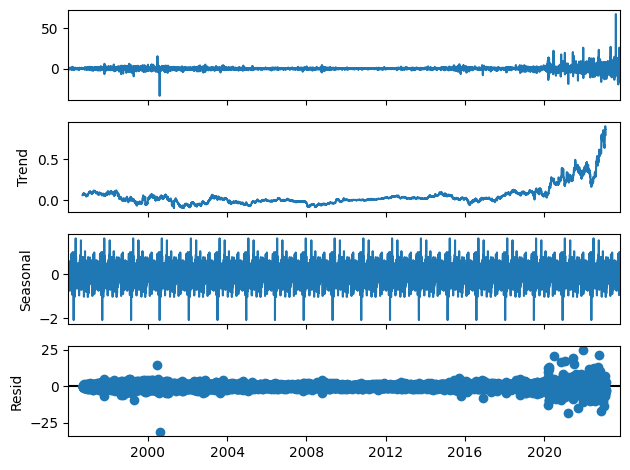

In [ ]:
from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df1_diff, model='additive', period=365)
result.plot()
pyplot.show()

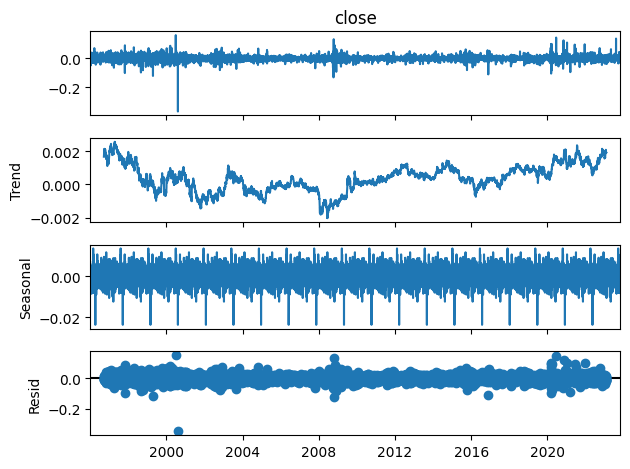

In [ ]:
result = seasonal_decompose(df1_log_diff, model='additive', period=365)
result.plot()
pyplot.show()

### Train / Test Split (80:20)

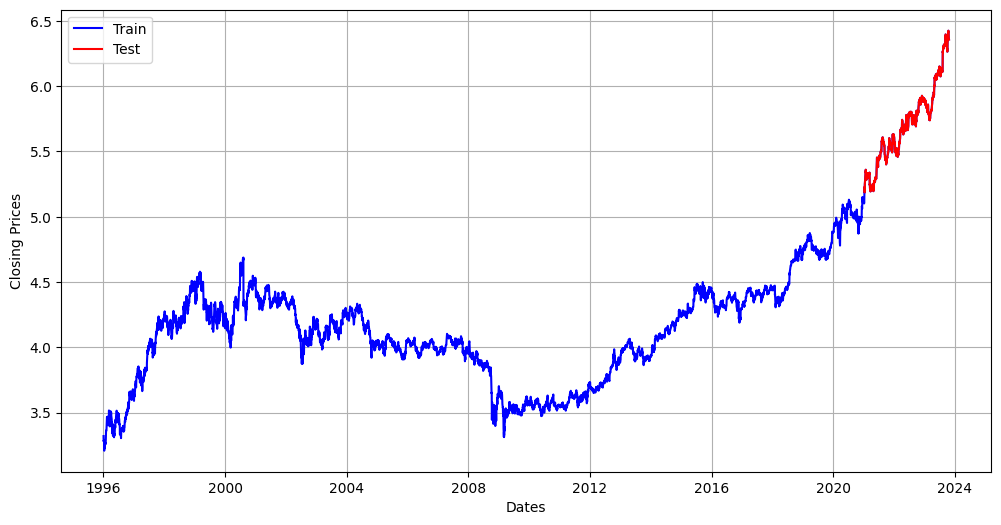

In [ ]:
train_data, test_data = df1_log[3:int(len(df1_log)*0.9)], df1_log[int(len(df1_log)*0.9):]
plt.figure(figsize=(12,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(df1_log, 'blue', label = 'Train')
plt.plot(test_data, 'red', label = 'Test')
plt.legend()
plt.show();

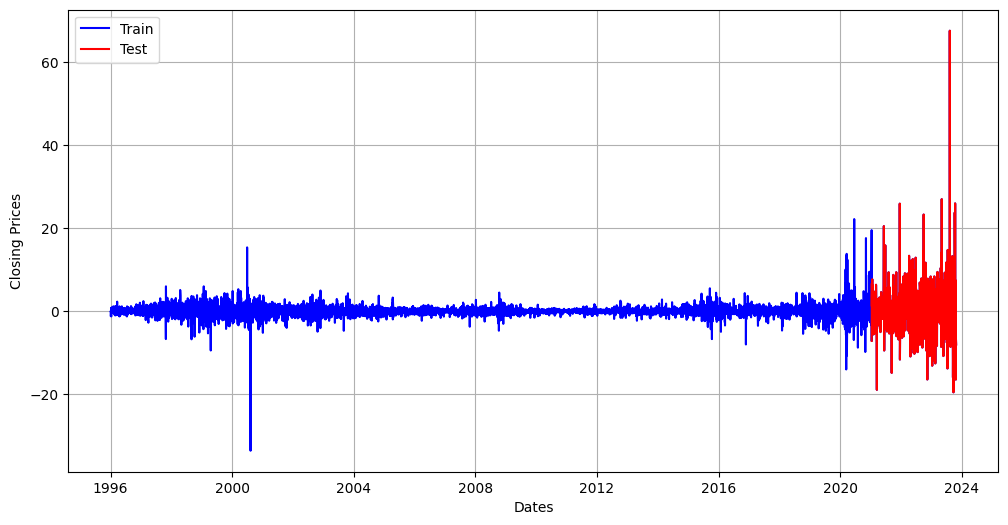

In [ ]:
train_data, test_data = df1_diff[3:int(len(df1_diff)*0.9)], df1_diff[int(len(df1_diff)*0.9):]
plt.figure(figsize=(12,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(df1_diff, 'blue', label = 'Train')
plt.plot(test_data, 'red', label = 'Test')
plt.legend()
plt.show();

### ARIMA Model
- When choosing parameters p, q, d, we will use Auto Arima method, which will discover the optimal order for the ARIMA model.

In [ ]:
# starting from 2012
df2_log = df1_log[4030:]

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-13045.684, Time=2.90 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-13063.838, Time=0.20 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-13062.630, Time=0.22 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-13042.432, Time=0.11 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-13064.231, Time=1.45 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-13066.140, Time=0.65 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-13064.463, Time=0.37 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-13061.952, Time=1.37 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=-13061.738, Time=0.36 sec

Best model:  ARIMA(3,1,0)(0,0,0)[0] intercept
Total fit time: 7.630 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2373
Model:               SARIMAX(3, 1, 0)   Log Likelihood                6538.070
Date:                Sat, 28 Oc

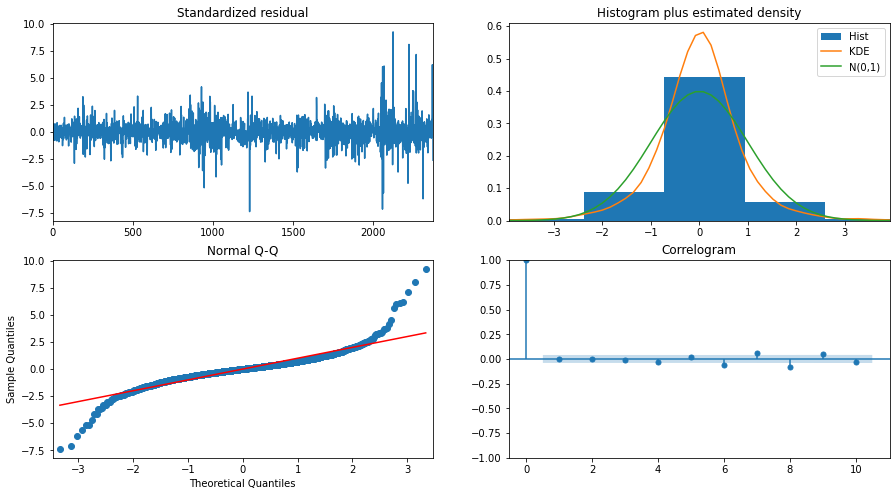

In [ ]:
train_data, test_data = df2_log[3:int(len(df2_log)*0.8)], df2_log[int(len(df2_log)*0.8):]

# using log-funciton
model_autoARIMA = auto_arima(train_data, start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p = 3, max_q = 3, # maximum p and q
                      m = 1,              # frequency of series
                      d = 1,           # let model determine 'd'
                      seasonal = False,   # No Seasonality
                      start_P = 0,
                      D = 0,
                      trace = True,
                      error_action = 'ignore',
                      suppress_warnings = True,
                      stepwise = True)
print(model_autoARIMA.summary())
model_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()

Interpreting Plots
* Top left: The residual errors are fluctuating around the mean of zero.
* Top right: The density plot shows the normal distribution with mean zero.
* Bottom left: The blue dots seem to fall perfectly under the red line.
* Botton right: ACF plot shows the residual errors are not autocorrelated.

Overall, it seems like a good fit.
--> Best model:  ARIMA(3,1,0)

### Prediction
Keeping 95% confidence level.

In [ ]:
# Using (3,1,0)
model = sm.tsa.ARIMA(train_data, order=(3,1,0))
result = model.fit()
print(result.summary())

                               SARIMAX Results                                
Dep. Variable:                  close   No. Observations:                 2373
Model:                 ARIMA(3, 1, 0)   Log Likelihood                6534.869
Date:                Sat, 28 Oct 2023   AIC                         -13061.738
Time:                        23:37:19   BIC                         -13038.652
Sample:                             0   HQIC                        -13053.334
                               - 2373                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0851      0.013     -6.468      0.000      -0.111      -0.059
ar.L2          0.0311      0.014      2.245      0.025       0.004       0.058
ar.L3         -0.0381      0.013     -2.997      0.0

In [ ]:
from scipy.stats import norm

# Make predictions on the test dataset
forecast = result.forecast(steps=len(test_data), alpha = 0.1)

# Calculate the mean squared error (MSE) from the model summary
mse = result.mse
stderr = np.sqrt(mse)
z_score = norm.ppf(1 - (0.05 / 2))  # For a 95% confidence interval
margin_of_error = z_score * stderr
lower_bound = forecast - margin_of_error
upper_bound = forecast + margin_of_error

In [ ]:
lower_bound_series = pd.Series(list(lower_bound), index=test_data.index)
upper_bound_series = pd.Series(list(upper_bound), index=test_data.index)
forecast_series = pd.Series(list(forecast), index=test_data.index)

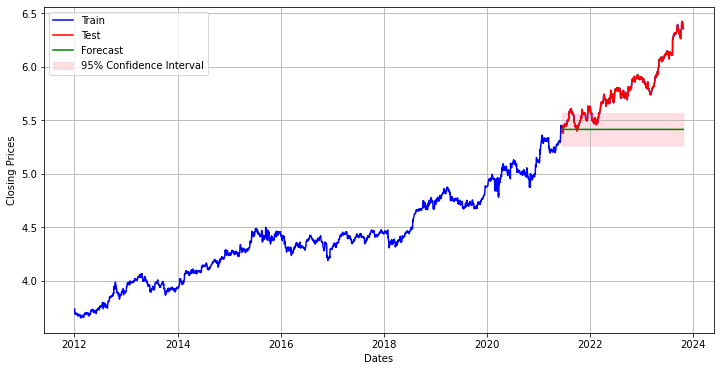

In [ ]:
# Plot the actual test data, the forecast, and the confidence intervals
plt.figure(figsize=(12, 6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(df2_log, 'blue', label='Train')
plt.plot(test_data, 'red', label='Test')
plt.plot(forecast_series, 'green', label='Forecast')
plt.fill_between(forecast_series.index,
                 lower_bound_series,
                 upper_bound_series,
                 color='pink', alpha=0.5, label='95% Confidence Interval')
plt.legend()
plt.show()

In [ ]:
mse = mean_squared_error(test_data, forecast_series)
print('MSE: '+str(mse))
mae = mean_absolute_error(test_data, forecast_series)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(test_data, forecast_series))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(forecast_series - test_data)/np.abs(test_data))
print('MAPE: '+str(mape))

MSE: 1.0934132388369118
MAE: 0.9065660647087602
RMSE: 1.0456640181420185
MAPE: 0.16447930798010452


To capture the overall trend and forecast into the future, we should use models that are specifically designed for long-term trend predictions. ARIMA models, including auto ARIMA, are better suited for short to medium-term predictions.

For long-term trend forecasting, we might consider using models like:

* Prophet: As previously discussed, Prophet is designed to capture long-term trends, seasonal patterns, and holidays. It's a good choice for forecasting over an extended horizon.

* Exponential Smoothing (ETS): ETS models, including Holt-Winters, are suitable for capturing both short-term and long-term trends. They can be adjusted for long-term forecasting by using a higher smoothing parameter for the trend component.

* Machine Learning Models: You can use machine learning models like Random Forest, Gradient Boosting, or Neural Networks for time series forecasting. These models can capture complex trends over an extended period if you provide them with the appropriate features and a longer historical window.

* Long Short-Term Memory (LSTM) neural networks are a type of recurrent neural network (RNN) that can be used for time series forecasting and, in many cases, can capture complex patterns, including increasing trends. LSTMs are particularly suitable when you have sequential data with long-range dependencies.

## Linear Regression

In [ ]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
X  = df[['open','high','low','Volume']].values
y = df['close'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=11)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
# Combine the Actual and Predicted Data
LR_df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted' : y_pred.flatten()})
LR_df.head()

,Actual,Predicted
0,93.8125,93.729657
1,41.0625,41.868940
2,78.3700,78.291022
3,79.8000,80.396890
4,49.2200,49.266705


In [ ]:
LR_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Actual,2101.0,90.526407,83.322945,25.875000,51.420000,66.250000,83.890000,607.24000
Predicted,2101.0,90.580440,83.532725,25.874596,51.445062,66.418267,83.818067,611.29059


In [ ]:
print('MSE:',round(mean_squared_error(y_test, y_pred), 3))
print('MAE:',round(mean_absolute_error(y_test, y_pred), 3))
print('RMSE:',round(np.sqrt(mean_squared_error(y_test, y_pred)), 3))
print('R2 Score:',round(r2_score(y_test, y_pred), 3))

MSE: 0.764
MAE: 0.459
RMSE: 0.874
R2 Score: 1.0


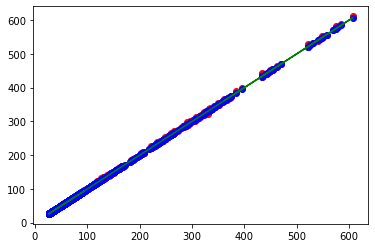

In [ ]:
plt.scatter(y_test, y_pred , color='red', marker='o')
plt.scatter(y_test, y_test, color='blue')
plt.plot(y_test, y_test, color='green');

## LSTM Model

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

In [ ]:
# create a new data frame with only 'Close column'
import math

# Import data
df = pd.read_csv("BATS_LLY_1996-2023.csv")
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%y').dt.strftime('%Y-%m-%d')
df = df.set_index('Date')

data = df["1996":"2023"][['Adj Close']]

dataset = data.values

training_data_len = math.ceil(len(dataset)*.8)  # selecting 80% of data for training the model
print(training_data_len)

data = data.reset_index()
data = data[['Date', 'Adj Close']]

5439


In [ ]:
data.columns = ['date', 'value']

# Normalize the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.00839262],
       [0.00553556],
       [0.00571412],
       ...,
       [0.97274364],
       [0.97788635],
       [0.97451501]])

In [ ]:
# creating the training dataset
train_data = scaled_data[0:training_data_len, :]

# splitting the data into x_train, y_train
X_train = []
y_train = []

# using the time step = 90 days
for i in range(90, len(train_data)):

    X_train.append(train_data[i-90:i, 0])
    y_train.append(train_data[i,0])

In [ ]:
#convert the x_train and y_train  to numppy array
X_train, y_train = np.array(X_train), np.array(y_train)

# reshaping the data as LSTM takes 3D array as input (3 input dimensions are: samples, time steps, and features)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train.shape

(5349, 90, 1)

In [ ]:
# building the LSTM model

model = Sequential()
model.add(LSTM(64,return_sequences=True, input_shape=(X_train.shape[1],1)))
model.add(LSTM(64, return_sequences= False))
model.add(Dense(32))
model.add(Dense(1))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 90, 64)            16896     
                                                                 
 lstm_1 (LSTM)               (None, 64)                33024     
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 52033 (203.25 KB)
Trainable params: 52033 (203.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# compiling the model
model.compile(optimizer='adam', loss='mean_squared_error')
# training the model
model.fit(X_train, y_train, batch_size=32, epochs=20)

Epoch 1/20
168/168 [==============================] - 14s 62ms/step - loss: 3.3237e-04
Epoch 2/20
168/168 [==============================] - 11s 63ms/step - loss: 5.1094e-05
Epoch 3/20
168/168 [==============================] - 11s 63ms/step - loss: 4.3227e-05
Epoch 4/20
168/168 [==============================] - 18s 105ms/step - loss: 3.8339e-05
Epoch 5/20
168/168 [==============================] - 20s 120ms/step - loss: 3.7687e-05
Epoch 6/20
168/168 [==============================] - 11s 63ms/step - loss: 3.5629e-05
Epoch 7/20
168/168 [==============================] - 10s 60ms/step - loss: 3.0062e-05
Epoch 8/20
168/168 [==============================] - 10s 60ms/step - loss: 2.8905e-05
Epoch 9/20
168/168 [==============================] - 11s 63ms/step - loss: 2.5199e-05
Epoch 10/20
168/168 [==============================] - 11s 67ms/step - loss: 2.5785e-05
Epoch 11/20
168/168 [==============================] - 11s 63ms/step - loss: 2.5303e-05
Epoch 12/20
168/168 [==================

In [ ]:
# creating the testing dataset
test_data = scaled_data[training_data_len-90:, :]

# creating the data sets x_test and y_test
X_test = []
y_test = dataset[training_data_len:,:]

for i in range(90, len(test_data)):
    X_test.append(test_data[i-90:i, 0])

In [ ]:
# converting test data into a numpy array
X_test = np.array(X_test)
# reshaping the test data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))
X_test.shape

(1359, 90, 1)

In [ ]:
# Get predictions
predictions = model.predict(X_test)

# Inverse transform the predictions to original scale
predictions = scaler.inverse_transform(predictions)

# Calculate RMSE (Root Mean Squared Error) to evaluate the model performance
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print('RMSE:', rmse)

43/43 [==============================] - 1s 28ms/step
Root Mean Squared Error: 8.73667296631772


In [ ]:
y_pred = predictions.copy()
print('MSE:',round(mean_squared_error(y_test, y_pred), 3))
print('RMSE:',round(np.sqrt(mean_squared_error(y_test, y_pred)), 3))

MSE: 76.329
RMSE: 8.737


In [ ]:
# plotting the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
train = train.set_index('date')
valid = valid.set_index('date')

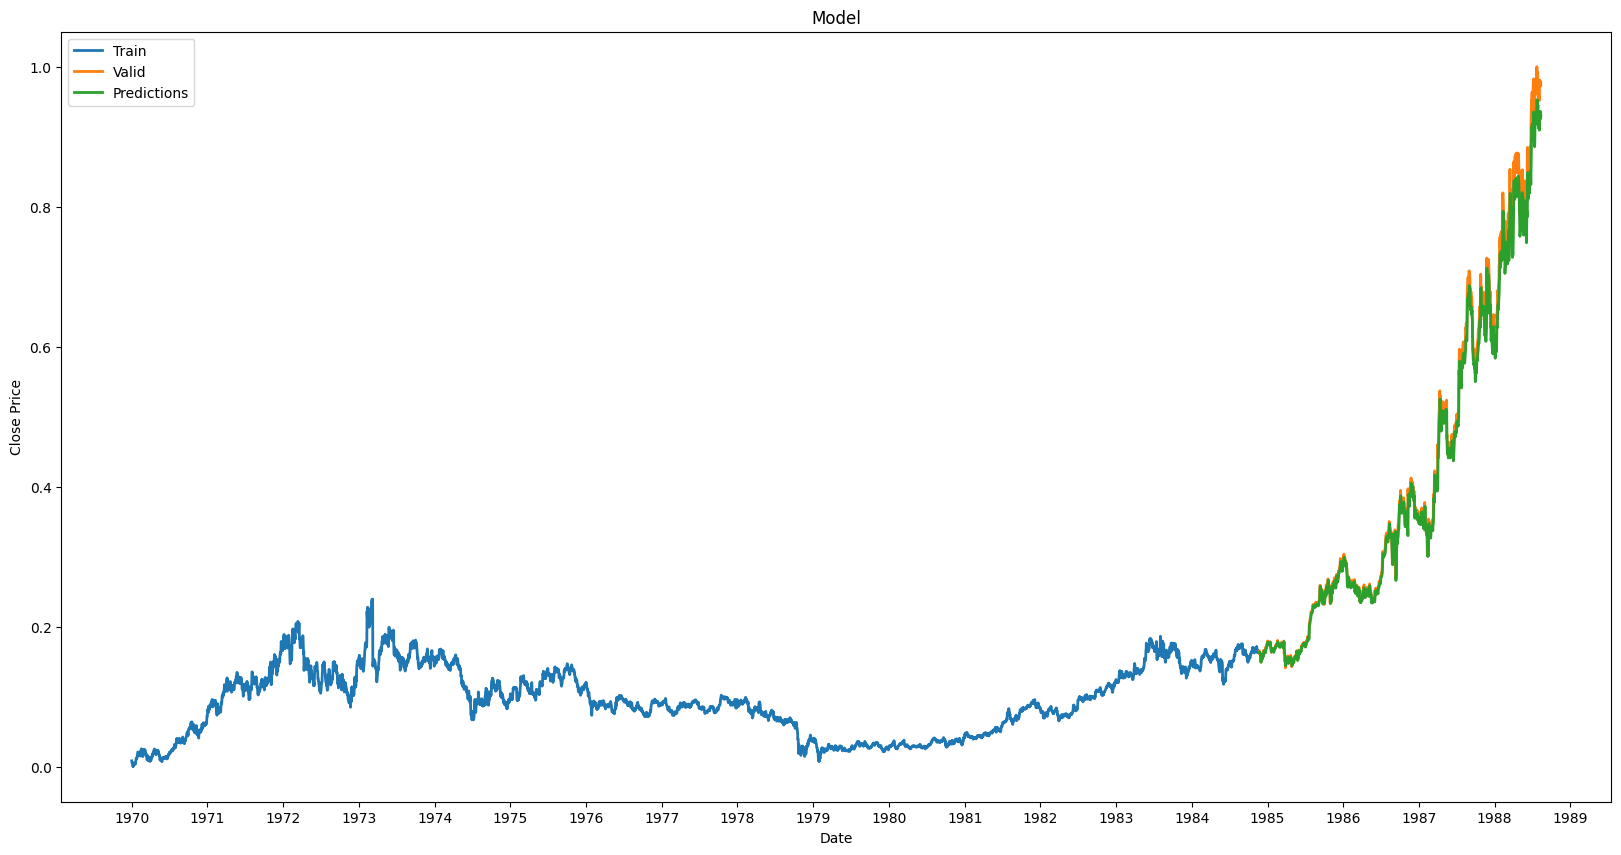

In [ ]:
import matplotlib.dates as mdates

# Assuming 'train' is your DataFrame with a DateTime index
plt.figure(figsize=(20, 10))
plt.title('Model')
plt.xlabel('Date', fontsize=10)
plt.ylabel('Close Price', fontsize=10)

plt.plot(train['value'], linewidth=2)
plt.plot(valid[['value', 'Predictions']], linewidth=2)
plt.legend(['Train', 'Valid', 'Predictions'])

# Set x-axis ticks to display only years
years = mdates.YearLocator()  # Set the locator to years
date_format = mdates.DateFormatter('%Y')  # Format the date as a 4-digit year

plt.gca().xaxis.set_major_locator(years)
plt.gca().xaxis.set_major_formatter(date_format)

plt.show()